In [1]:
#This practice notebook relies on the princinples discussed in Deep Learning with Python, by Francois Chollet

In [2]:
#basic imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
#keras imports
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Dense, Conv1D, Bidirectional, GRU, LSTM, Flatten, SimpleRNN, Dropout
from keras import models
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
imdb_dir= 'P:\Databases\LMR, IMDB'
train_dir = os.path.join(imdb_dir, 'train')
test_dir = os.path.join(imdb_dir, 'test')

Load the data

In [6]:
train_labels=[]
train_texts=[]
test_labels=[]
test_texts=[]

In [7]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for file in os.listdir(dir_name):
        f = open(os.path.join(dir_name, file), encoding = 'utf-8')
        train_texts.append(f.read())
        f.close()
        if (label_type == 'neg'):
            train_labels.append(0)
        else:
            train_labels.append(1)


In [8]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for file in os.listdir(dir_name):
        f = open(os.path.join(dir_name, file), encoding = 'utf-8')
        test_texts.append(f.read())
        f.close()
        if (label_type == 'neg'):
            test_labels.append(0)
        else:
            test_labels.append(1)

Explore the data a teeny bit

In [9]:
phrase_length=[]
for text in train_texts:
    words=word_tokenize(text)
    l=len(words)
    phrase_length.append(l)
    
max_words=np.max(phrase_length)
print(max_words)

2818


In [10]:
print(len(train_labels))
print(len(train_texts))
print(len(test_labels))
print(len(test_texts))

25000
25000
25000
25000


Set parameters

In [11]:
maxlen=2820
max_words=10000

Tokenize

In [12]:
%%time
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
sequences=tokenizer.texts_to_sequences(train_texts)


Wall time: 6.89 s


In [13]:
#explore the word index

word_index = tokenizer.word_index
print('Unique words:', len(word_index))

Unique words: 88582


In [14]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(train_labels)

print(data.shape)
print(labels.shape)

(25000, 2820)
(25000,)


In [15]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [16]:
#create a valuation set
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)

In [17]:
x_train.shape

(20000, 2820)

In [18]:
#prepare the test set
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences, maxlen=maxlen)
labels=np.asarray(test_labels)

print(len(test_data))
print(len(test_labels))

25000
25000


In [19]:
#defining the models

#basic model

model1= models.Sequential()
model1.add(Embedding(max_words, 100, input_length = maxlen))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2820, 100)         1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 282000)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 282000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                9024032   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 10,024,065
Trainable params: 10,024,065
Non-trainable params: 0
_________________________________________________________________


In [20]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
history1 = model1.fit(x_train, y_train, epochs=10, batch_size = 32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 176s 9ms/step - loss: 5.9290 - acc: 0.5011 - val_loss: 0.6931 - val_acc: 0.5038
Epoch 2/10
20000/20000 [==============================] - 184s 9ms/step - loss: 0.6954 - acc: 0.4959 - val_loss: 0.6997 - val_acc: 0.4950
Epoch 3/10
20000/20000 [==============================] - 167s 8ms/step - loss: 0.6647 - acc: 0.5706 - val_loss: 0.4629 - val_acc: 0.7742
Epoch 4/10
20000/20000 [==============================] - 195s 10ms/step - loss: 0.3040 - acc: 0.8703 - val_loss: 0.2995 - val_acc: 0.8766
Epoch 5/10
20000/20000 [==============================] - 222s 11ms/step - loss: 0.1479 - acc: 0.9423 - val_loss: 0.3294 - val_acc: 0.8772
Epoch 6/10
20000/20000 [==============================] - 229s 11ms/step - loss: 0.0764 - acc: 0.9711 - val_loss: 0.4114 - val_acc: 0.8700
Epoch 7/10
20000/20000 [==============================] - 193s 10ms/step - loss: 0.0367 - acc: 0.9868 - val_loss: 0.5076

In [22]:
scores = model1.evaluate(test_data, test_labels, verbose=1)
print(scores)

25000/25000 [==============================] - 32s 1ms/step
[0.7241173470971337, 0.8712]


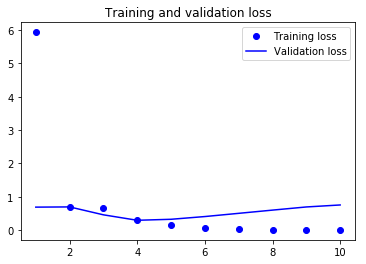

In [23]:
#Plot the model

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

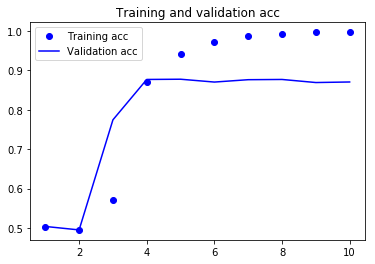

In [48]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [ ]:
#Highest accuracy and lowest loss seems to be at around epoch 4, with a validation accuracy of 87%

In [25]:
#Simple RNN model

model2=models.Sequential()
model2.add(Embedding(max_words, 32))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))

In [26]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
history2 = model2.fit(x_train, y_train, epochs=10, batch_size = 32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 305s 15ms/step - loss: 0.5805 - acc: 0.6678 - val_loss: 0.3845 - val_acc: 0.8314
Epoch 2/10
20000/20000 [==============================] - 266s 13ms/step - loss: 0.3604 - acc: 0.8506 - val_loss: 0.3768 - val_acc: 0.8432
Epoch 3/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.2957 - acc: 0.8828 - val_loss: 0.3698 - val_acc: 0.8558
Epoch 4/10
20000/20000 [==============================] - 159s 8ms/step - loss: 0.2809 - acc: 0.8909 - val_loss: 0.3771 - val_acc: 0.8442
Epoch 5/10
20000/20000 [==============================] - 158s 8ms/step - loss: 0.2528 - acc: 0.9037 - val_loss: 0.3839 - val_acc: 0.8390
Epoch 6/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.2675 - acc: 0.8976 - val_loss: 0.3835 - val_acc: 0.8478
Epoch 7/10
20000/20000 [==============================] - 154s 8ms/step - loss: 0.2272 - acc: 0.9146 - val_loss: 0.4198 -

In [28]:
scores = model2.evaluate(test_data, test_labels, verbose=1)
print(scores)

25000/25000 [==============================] - 50s 2ms/step
[0.45393314307928084, 0.83304]


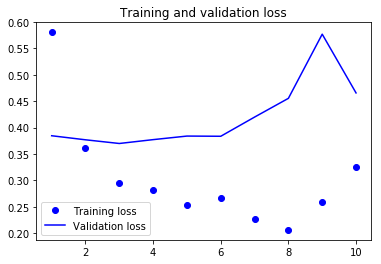

In [29]:
#Plot the model

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

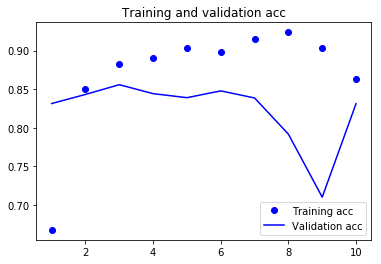

In [47]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [31]:
#highest accuracy and lowest loss seems to be at around epoch 3, with a validation accuracy of about 86%
#Simple RNN isn't very good at processing long sequences, such as text
#Long-term time dependencies are impossible to learn in practice

In [32]:
#LSTM layer

model3= models.Sequential()
model3.add(Embedding(max_words, 64))
model3.add(LSTM(32))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [33]:
history3 = model3.fit(x_train, y_train, epochs=10, batch_size = 64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 420s 21ms/step - loss: 0.4279 - acc: 0.8045 - val_loss: 0.3483 - val_acc: 0.8542
Epoch 2/10
20000/20000 [==============================] - 437s 22ms/step - loss: 0.2593 - acc: 0.9005 - val_loss: 0.3043 - val_acc: 0.8778
Epoch 3/10
20000/20000 [==============================] - 453s 23ms/step - loss: 0.2105 - acc: 0.9235 - val_loss: 0.3021 - val_acc: 0.8812
Epoch 4/10
20000/20000 [==============================] - 432s 22ms/step - loss: 0.1849 - acc: 0.9321 - val_loss: 0.3102 - val_acc: 0.8774
Epoch 5/10
20000/20000 [==============================] - 429s 21ms/step - loss: 0.1559 - acc: 0.9426 - val_loss: 0.3374 - val_acc: 0.8644
Epoch 6/10
20000/20000 [==============================] - 409s 20ms/step - loss: 0.1455 - acc: 0.9491 - val_loss: 0.3330 - val_acc: 0.8800
Epoch 7/10
20000/20000 [==============================] - 409s 20ms/step - loss: 0.1285 - acc: 0.9548 - val_loss: 0.3

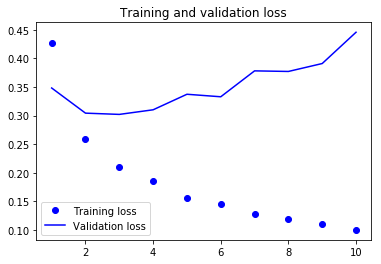

In [34]:
#Plot the model

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

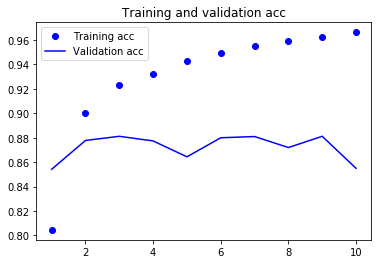

In [46]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [36]:
#highest accuracy and lowest loss seems to be at around epoch 2, with a validation accuracy of about 0.88

In [37]:
scores = model3.evaluate(test_data, test_labels, verbose=1)
print(scores) 

25000/25000 [==============================] - 137s 5ms/step
[0.45390477530986073, 0.84884]


In [38]:
#GRU with dropout

model4= models.Sequential()
model4.add(Embedding(max_words, 128))
model4.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [39]:
history4 = model4.fit(x_train, y_train, epochs=10, batch_size = 32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 921s 46ms/step - loss: 0.4860 - acc: 0.7672 - val_loss: 0.3685 - val_acc: 0.8420
Epoch 2/10
20000/20000 [==============================] - 827s 41ms/step - loss: 0.3309 - acc: 0.8658 - val_loss: 0.3537 - val_acc: 0.8606
Epoch 3/10
20000/20000 [==============================] - 806s 40ms/step - loss: 0.2769 - acc: 0.8935 - val_loss: 0.2998 - val_acc: 0.8796
Epoch 4/10
20000/20000 [==============================] - 845s 42ms/step - loss: 0.2346 - acc: 0.9114 - val_loss: 0.2915 - val_acc: 0.8838
Epoch 5/10
20000/20000 [==============================] - 851s 43ms/step - loss: 0.1967 - acc: 0.9276 - val_loss: 0.3021 - val_acc: 0.8820
Epoch 6/10
20000/20000 [==============================] - 1710s 86ms/step - loss: 0.1716 - acc: 0.9358 - val_loss: 0.2921 - val_acc: 0.8874
Epoch 7/10
20000/20000 [==============================] - 1181s 59ms/step - loss: 0.1519 - acc: 0.9444 - val_loss: 0

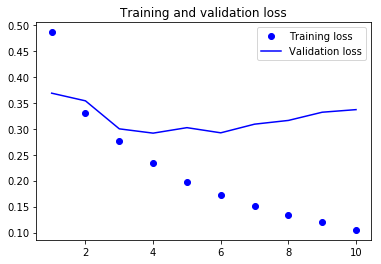

In [41]:
#Plot the model

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

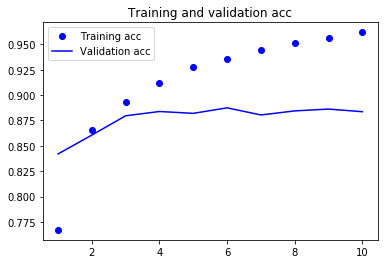

In [42]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [43]:
scores = model4.evaluate(test_data, test_labels, verbose=1)
print(scores)

25000/25000 [==============================] - 216s 9ms/step
[0.3338586046087742, 0.8816]


In [44]:
#highest accuracy and lowest loss seems to be at around epoch 4, with a validation accuracy of about 88%
#training this model takes significantly longer due to the increased dimensionality

In [49]:
#Despite the different types and complexities of the neural networks used in the later models,
#the nature of the task at hand leads the first model to be the second most accurate. 
#The most accurate model, though, is the 4th model, which uses a combination of GRU layers, dropout, and a higher dimensionsality. 